In [1]:
import audio_processing as ap
import audio_utils as au
import prototype as pr
import math
import numpy.fft as fft
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

instrs = ["guitar", "clarinet", "flute", "saxophone", "violin"]

In [2]:
def prediction(probs, instrs):
    predict_list = []
    for i in probs:
        predict_list.append(instrs[np.argmax(i)])
    return predict_list

def frequency(predict_list, desired):
    sum = 0
    for i in predict_list:
        if i == desired:
            sum += 1
    return sum

def freq_list(predict_list, instrs):
    list = [0]*len(instrs)
    for i in range(len(instrs)):
        for j in predict_list:
            if j == instrs[i]:
                list[i] += 1
    return list

def confusion_matrix (probs_list, instrs, outp_length):
    """Gets confusion matrix for a networks output."""
    confusion = np.zeros((outp_length, outp_length))
    for indx in range(len(probs_list)):
        # print(desired[indx])
        i = indx
        # print(actual[indx])
        #print(probs_list[indx])
        for k in probs_list[indx]:
            j = np.argmax(k)
            confusion[i][j] += 1
    return confusion

def print_cc_info(cc, data_length, categories):
    sum1, sum2 = 0, 0
    class_list = []
    for i in range(len(cc)):
        for j in range(len(cc[i])):
            if j == i: 
                sum1 += cc[i][j]
                class_list.append(cc[i][j])
            sum2 += cc[i][j]
    print("This NN got correct ", sum1, " out of ", sum2, " tests")
    print("which is ", str(sum1/sum2)[:5])
    print(categories)
    for i in range(len(categories)):
        print("For", categories[i], ", This NN classified", class_list[i], " out of ", data_length)
        print("which is ", str(class_list[i]/data_length)[:5])

In [3]:
instrs = ["guitar", "clarinet", "flute", "saxophone", "violin"]

[[  16.    0.    2.    0.    3.]
 [   1.  690.    8.   18.    3.]
 [  33.  303.  144.   84.  167.]
 [   3.  490.   19.   39.   20.]
 [  58.  310.  190.  110.  183.]]


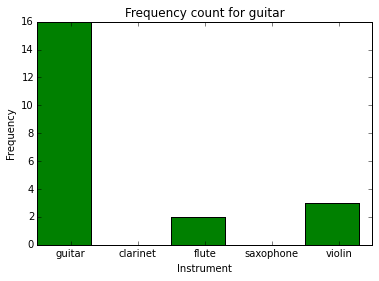

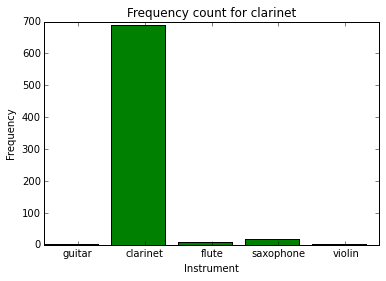

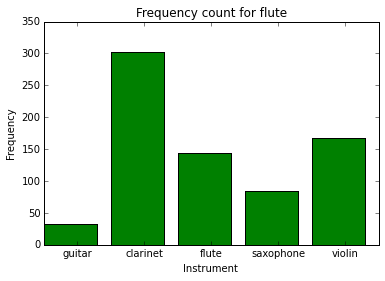

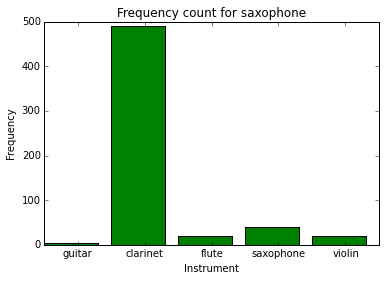

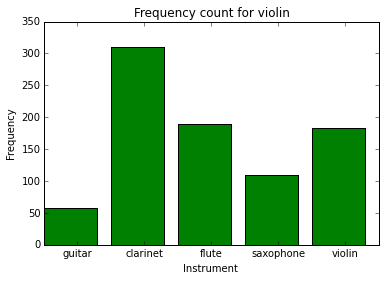

In [6]:
h_data = []
instrs = ["guitar", "clarinet", "flute", "saxophone", "violin"]
ind = 0
for instr in instrs:
    h_data.append(au.fetch_harmonic_rep(instr))
    
proto_list = []
for i in h_data:
    proto_list.append(pr.create_prototype(i[:50])) # use the first 50 examples to create the prototype
probs_list = []  
for h in h_data:
    probs_list.append(pr.prototype_model(h[50:], proto_list, pr.euclid_d)) # use the rest as testing
    
cm = confusion_matrix(probs_list, instrs, 5)
print(cm)    

tick_pos = [0.5, 1.5, 2.5, 3.5, 4.5]
for i in range(len(instrs)):
    plt.bar(range(len(instrs)), cm[i], width=.8, color='g')
    plt.ylabel('Frequency')
    plt.title('Frequency count for ' + instrs[i])
    plt.xticks(tick_pos, instrs)
    plt.xlabel("Instrument")
    plt.show()





[[  58.    0.    1.    8.    4.]
 [   2.  516.   51.  164.   37.]
 [   0.   60.  572.   53.   96.]
 [  17.  151.   17.  380.   56.]
 [  16.    4.  156.   94.  631.]]


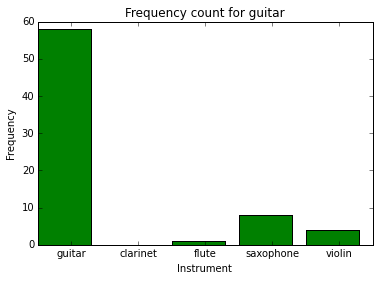

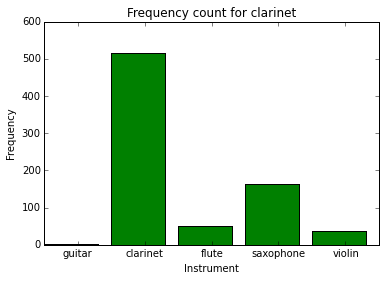

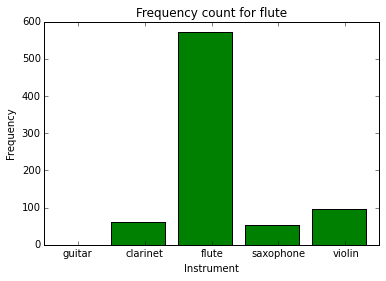

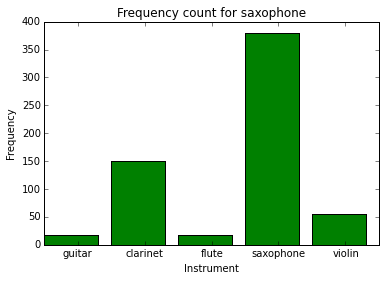

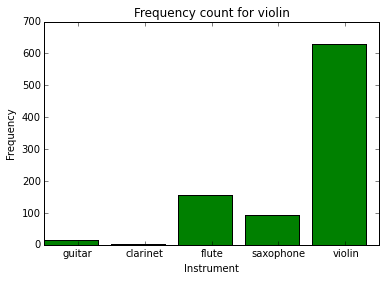

In [8]:
f_data = []
ind = 0

for instr in instrs:
    f_data.append(au.fetch_nflux_rep(instr))
    
proto_list = []
for i in f_data:
    proto_list.append(pr.create_prototype(i))
probs_list = []  
for f in f_data:
    probs_list.append(pr.prototype_model(f, proto_list, pr.euclid_d))
    
    
cm = confusion_matrix(probs_list, instrs, 5)
print(cm)


tick_pos = [0.5, 1.5, 2.5, 3.5, 4.5]
for i in range(len(instrs)):
    plt.bar(range(len(instrs)), cm[i], width=.8, color='g')
    plt.ylabel('Frequency')
    plt.title('Frequency count for ' + instrs[i])
    plt.xticks(tick_pos, instrs)
    plt.xlabel("Instrument")
    plt.show()




In [46]:
zcr_data = [np.loadtxt("reps/guitar_zcr.txt"), np.loadtxt("reps/clarinet_zcr.txt"), np.loadtxt("reps/flute_zcr.txt"), np.loadtxt("reps/saxophone_zcr.txt"), np.loadtxt("reps/violin_zcr.txt")]
sc_data = [np.loadtxt("reps/guitar_centroid.txt"), np.loadtxt("reps/clarinet_centroid.txt"), np.loadtxt("reps/flute_centroid.txt"), np.loadtxt("reps/saxophone_centroid.txt"), np.loadtxt("reps/violin_centroid.txt")]
fund_data = [np.loadtxt("reps/guitar_funds.txt"), np.loadtxt("reps/clarinet_funds.txt"), np.loadtxt("reps/flute_funds.txt"), np.loadtxt("reps/saxophone_funds.txt"), np.loadtxt("reps/violin_funds.txt")]

[[  38.    0.    9.   20.    4.]
 [  96.   22.  473.  142.   37.]
 [  30.   43.  514.  150.   44.]
 [ 116.   45.  281.  134.   45.]
 [  61.   66.  419.  270.   85.]]


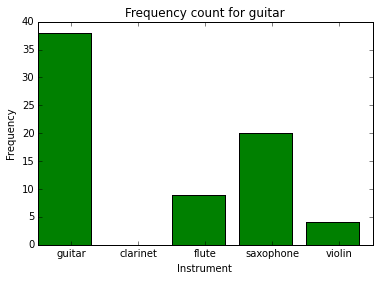

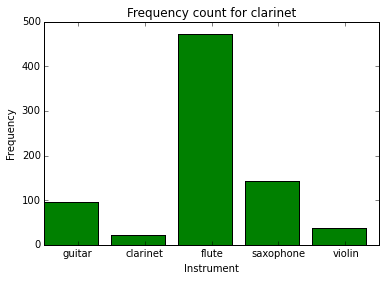

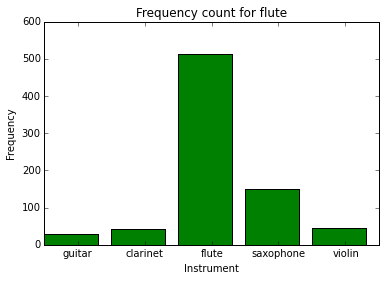

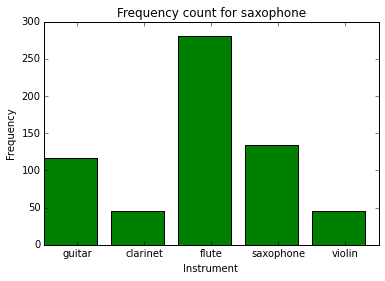

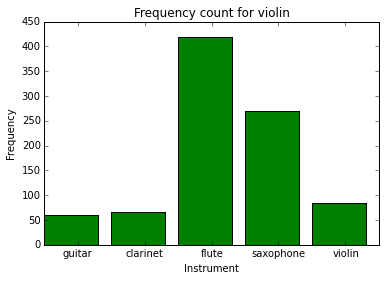

In [47]:

sc = []
for i in range(len(instrs)):
    vectors = []
    for j in range(len(sc_data[i])):
        ex = []
        ex.append(sc_data[i][j]/fund_data[i][j])
        vectors.append(ex)
    sc.append(vectors)
    

proto_list = []
for i in sc:
    proto_list.append(pr.create_prototype(i))
probs_list = []  
for f in sc:
    probs_list.append(pr.prototype_model(f, proto_list, pr.euclid_d))
    
cm = confusion_matrix(probs_list, instrs, 5)
print(cm)


tick_pos = [0.5, 1.5, 2.5, 3.5, 4.5]
for i in range(len(instrs)):
    plt.bar(range(len(instrs)), cm[i], width=.8, color='g')
    plt.ylabel('Frequency')
    plt.title('Frequency count for ' + instrs[i])
    plt.xticks(tick_pos, instrs)
    plt.xlabel("Instrument")
    plt.show()

    



[[  38.    0.    9.   20.    4.]
 [  96.   22.  473.  142.   37.]
 [  30.   43.  514.  150.   44.]
 [ 116.   45.  281.  134.   45.]
 [  61.   66.  419.  270.   85.]]


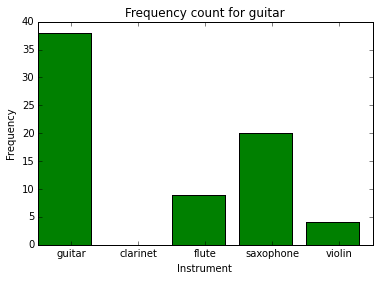

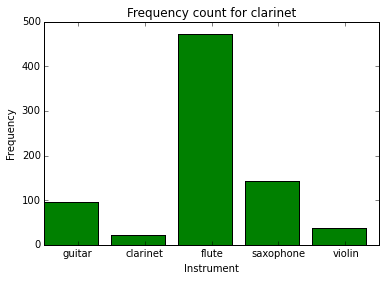

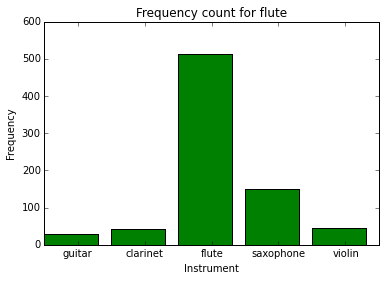

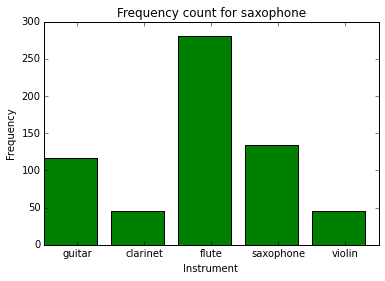

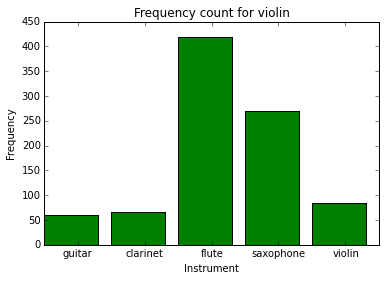

In [35]:
zc_data = []
instrs = ["guitar", "clarinet", "flute", "saxophone", "violin"]


for i in range(len(instrs)):
    vectors = []
    for j in range(len(zcr_data[i])):
        ex = []
        ex.append(zcr_data[i][j])
        ex.append(sc_data[i][j]/fund_data[i][j])
        vectors.append(ex)
    zc_data.append(vectors)
    

proto_list = []
for i in zc_data:
    proto_list.append(pr.create_prototype(i))
probs_list = []  
for f in zc_data:
    probs_list.append(pr.prototype_model(f, proto_list, pr.euclid_d))
    
cm = confusion_matrix(probs_list, instrs, 5)
print(cm)


tick_pos = [0.5, 1.5, 2.5, 3.5, 4.5]
for i in range(len(instrs)):
    plt.bar(range(len(instrs)), cm[i], width=.8, color='g')
    plt.ylabel('Frequency')
    plt.title('Frequency count for ' + instrs[i])
    plt.xticks(tick_pos, instrs)
    plt.xlabel("Instrument")
    plt.show()

    
